In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.interpolate as sp
#from derivatives import gstar,dgSdx

In [2]:
T, g_star, g_star_s = np.loadtxt("SMgstar.dat", usecols = (0,1,2), unpack = True)

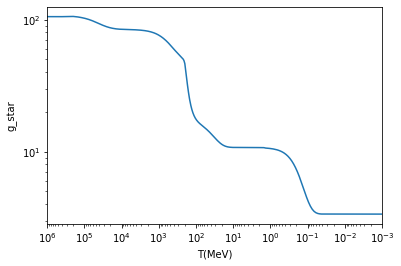

In [3]:
plt.figure()
plt.loglog(T, g_star)
plt.xlim(1e6,1e-3)
plt.ylabel('g_star')
plt.xlabel('T(MeV)')
plt.show()

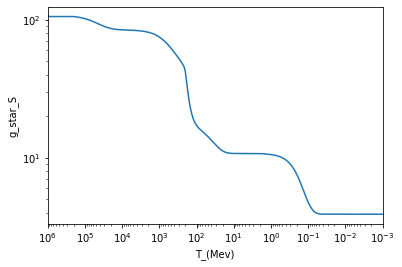

In [4]:
plt.figure()
plt.loglog(T, g_star_s)
plt.xlim(1e6,1e-3)
plt.ylabel('g_star_S')
plt.xlabel('T_(Mev)')
plt.show()

In [5]:
T, g_star, g_star_s = np.loadtxt("SMgstar.dat", usecols = (0,1,2), unpack = True)
x = 1/T[::-1]
g = sp.CubicSpline(x,g_star[::-1])
gs = sp.CubicSpline(x,g_star_s[::-1])

M_spline_gs = np.zeros((len(x)-1,5))
M_spline_gss = np.zeros((len(x)-1,5))


for i in range(0,len(x)-1):
    M_spline_gss[i,0] = x[i]
    M_spline_gss[i,1] = gs(x[i])
    M_spline_gss[i,2] = gs(x[i],1)
    M_spline_gss[i,3] = gs(x[i],2)
    M_spline_gss[i,4] = gs(x[i],3)

for i in range(0,len(x)-1):
    M_spline_gs[i,0] = x[i]
    M_spline_gs[i,1] = g(x[i])
    M_spline_gs[i,2] = g(x[i],1)
    M_spline_gs[i,3] = g(x[i],2)
    M_spline_gs[i,4] = g(x[i],3)
    
    
def spline_funk(x,p):
    dx = (x - p[0]) 
    spline = p[1] + p[2]*dx + (1/2)*p[3]*(dx)**2 + (1/6)*p[4]*(dx)**3
    return spline

x1_axis = np.zeros(10*(len(x)-2)) 
y1_axis = np.zeros(10*(len(x) -2))

x2_axis = np.zeros(10*(len(x)-2)) 
y2_axis = np.zeros(10*(len(x) -2))

x3_axis = np.zeros(10*(len(x)-2)) 
y3_axis = np.zeros(10*(len(x) -2))

x4_axis = np.zeros(10*(len(x)-2)) 
y4_axis = np.zeros(10*(len(x) -2))

def dg_spline_funk_dx(x,p):
    dx = (x - p[0])
    spline_diff = 0 + p[2] + p[3]*(dx) + (1/2)*p[4]*dx**2 
    return spline_diff


g_star_matrix = np.zeros((len(x)-1,5))
g_star_s_matrix = np.zeros((len(x)-1,5))


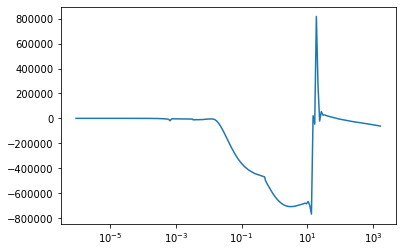

In [6]:
plt.figure()
plt.semilogx(1/T, g(x,1))
plt.show()

In [7]:
##spline_fit_gs
for i in range(len(x) - 2):
    x1temp = np.linspace(M_spline_gs[i,0], M_spline_gs[i + 1, 0], 11)
    for j in range (10):
        x1_axis[i*10+j] = x1temp[j] 
        y1_axis[i*10+j] = spline_funk(x1temp[j], M_spline_gs[i,:])

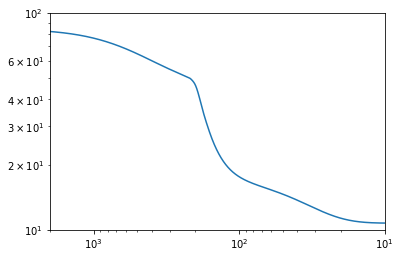

In [8]:
plt.figure()
plt.loglog(1/(x1_axis), y1_axis)
plt.xlim(2000,10)
plt.ylim(10,100)
plt.show()

In [9]:
##spline_derr_gs
for i in range(len(x) - 2):
    x2temp = np.linspace(M_spline_gs[i,0], M_spline_gs[i + 1, 0], 11)
    for j in range (10):
        x2_axis[i*10+j] = x2temp[j] 
        y2_axis[i*10+j] = dg_spline_funk_dx(x2temp[j], M_spline_gs[i,:])

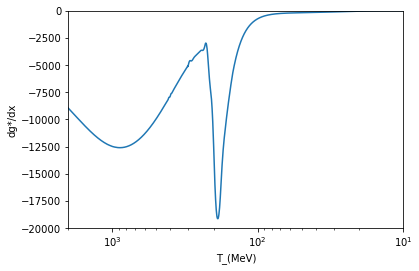

In [10]:
plt.figure()
plt.semilogx(1/(x2_axis), y2_axis)
plt.xlim(2000,10)
plt.ylim(-20000,0)
plt.ylabel('dg*/dx')
plt.xlabel('T_(MeV)')
plt.show()

In [11]:
y2_axis

array([-6.23512037e+04, -6.20383787e+04, -6.17324485e+04, ...,
        6.31590129e-30,  7.73026452e-30,  8.65804521e-30])

In [12]:
##spline_fit_gss
for i in range(len(x) - 2):
    x3temp = np.linspace(M_spline_gss[i,0], M_spline_gss[i + 1, 0], 11)
    for j in range (10):
        x3_axis[i*10+j] = x3temp[j] 
        y3_axis[i*10+j] = spline_funk(x3temp[j], M_spline_gss[i,:])

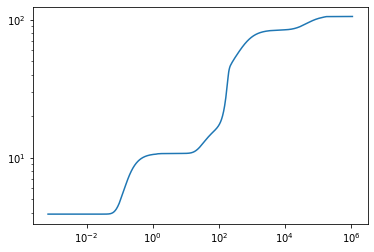

In [13]:
plt.figure()
plt.loglog(1/(x3_axis), y3_axis)
plt.show()

In [14]:
##spline_derr_gss
for i in range(len(x) - 2):
    x4temp = np.linspace(M_spline_gss[i,0], M_spline_gss[i + 1, 0], 11)
    for j in range (10):
        x4_axis[i*10+j] = x4temp[j] 
        y4_axis[i*10+j] = dg_spline_funk_dx(x4temp[j], M_spline_gss[i,:])

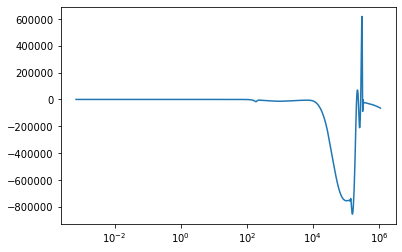

In [15]:
plt.figure()
plt.semilogx(1/(x4_axis), y4_axis)
plt.show()

In [16]:
print(M_spline_gs)

[[ 9.04983436e-07  1.05367090e+02 -6.23512037e+04  8.63505319e+10
  -5.13962589e+17]
 [ 9.41610010e-07  1.05364860e+02 -5.95332215e+04  6.75258431e+10
  -5.13962589e+17]
 [ 9.79466849e-07  1.05362650e+02 -5.73451967e+04  4.80688442e+10
   5.92181640e+17]
 ...
 [ 1.18553226e+03  3.36264385e+00  5.69831844e-29 -1.33775083e-30
   1.14044671e-32]
 [ 1.33018912e+03  3.36264385e+00 -1.72089523e-29  3.11983546e-31
  -1.84704905e-33]
 [ 1.49249679e+03  3.36264385e+00  9.09924337e-30  1.21933172e-32
  -1.84704905e-33]]


In [17]:
print(M_spline_gss)

[[ 9.04983436e-07  1.05361760e+02 -6.49196964e+04  9.43590436e+10
  -6.72299859e+17]
 [ 9.41610010e-07  1.05359440e+02 -6.19145950e+04  6.97350032e+10
  -6.72299859e+17]
 [ 9.79466849e-07  1.05357140e+02 -5.97563983e+04  4.42838558e+10
   3.10509178e+17]
 ...
 [ 1.18553226e+03  3.90909085e+00  2.53519673e-29 -5.95168834e-31
   5.07387714e-33]
 [ 1.33018912e+03  3.90909085e+00 -7.65630775e-30  1.38802293e-31
  -8.21756940e-34]
 [ 1.49249679e+03  3.90909085e+00  4.04827710e-30  5.42483861e-33
  -8.21756940e-34]]


In [18]:
np.set_printoptions(threshold=np.inf)

In [19]:
##create .npz files for the matrices 
## gstar and gsstar spline and der should go in the file. 

np.savez("Relativistic_Degrees_of_Freedom", T = x, g_star = M_spline_gs, g_star_s = M_spline_gss )